In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

In [21]:
#Option pricing functions from 
#https://medium.com/swlh/calculating-option-premiums-using-the-black-scholes-model-in-python-e9ed227afbee

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)


#Geometric Brownian motion path generator 

def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [13]:


test = 1//2
print(test)

0


0
[[5.00000000e+001 1.58182522e+000]
 [2.25963069e-314 2.25956675e-314]
 [1.18575755e-322 2.17172285e-314]
 [            nan 0.00000000e+000]
 [4.94065646e-324 4.24399158e-314]
 [5.62740771e-321 2.25956684e-314]
 [2.12199579e-314 0.00000000e+000]
 [1.18575755e-322 2.17172285e-314]
 [4.94065646e-324 4.94065646e-324]
 [4.94065646e-324 4.24399158e-314]
 [4.24399159e-314 2.16369015e-314]
 [4.94065646e-324 4.94065646e-323]
 [6.36598737e-314 1.90979621e-313]
 [1.03753786e-322 2.25956674e-314]
 [2.16369015e-314 4.24399158e-314]
 [4.94065646e-324 1.90979621e-313]
 [1.18575755e-322 2.16369167e-314]
 [4.94065646e-324 2.12199579e-314]
 [2.12199579e-313 2.97079411e-313]
 [4.24399159e-314 2.25956679e-314]
 [2.16369167e-314 4.94065646e-324]
 [4.94065646e-324 2.97079411e-313]
 [2.12199633e-314 2.25956697e-314]
 [3.45845952e-323 0.00000000e+000]
 [2.12199633e-314 2.25956697e-314]
 [3.45845952e-323 2.25956686e-314]
 [4.24399212e-314 2.25956697e-314]
 [3.45845952e-323 2.25956688e-314]
 [4.24399212e-314 

RuntimeError: The animation function must return a sequence of Artist objects.

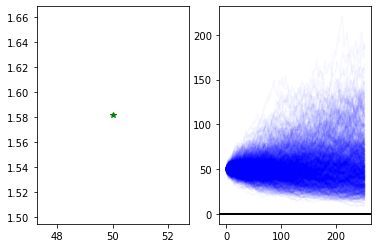

In [50]:

np.random.seed(123)
from matplotlib import animation


#This section of code defines a range for each parameter of interest
#then it will loop over the range for a given parameter, and will plot the stored result 
S0 = 100
K = 100
r = 0.05
sigma = 0.50
T = 1
N = 252
deltat = T / N
i = 1000
discount_factor = np.exp(-r * T)

#change the strike price 
step = 1

range_pair = [50,150]
steps = 100
step_width = (range_pair[0]-range_pair[1])/steps
store = np.empty([100, 2])
fig, axs = plt.subplots(1,2)

counter = 0

def animate(idx):
    #x = i*((range_pair[1]-range_pair[0])/steps)
    x = np.linspace(range_pair[0], range_pair[1], steps)
    S_temp = x[idx]
    print(idx)
    store[idx,0] = S_temp
    price = bs_call(S_temp,K,1,r,sigma)
    store[idx,1] = price
    print(store)
    #axs[0].plot(store[:,0],store[:,1])
    axs[0].plot(S_temp, price, 'g*')  
   
    for y in range(0,i-1):
        paths = gen_paths(S_temp, r, sigma, T, N, i)
        axs[1].plot(paths[:,y],color='b',alpha = 0.03)
        axs[1].axhline(y = 0, color = 'black', linestyle = '-') 
        
        
anim = animation.FuncAnimation(fig, animate, frames=200, interval=1, blit=True)

    # mask = ma.masked_less(paths[:,y], K)
    # plt.plot(mask,color='red',alpha = 0.03)


# plt.title('Simulations %d Steps %d Sigma %.2f r %.2f S0 %.2f' % (i, N, sigma, r, S0))
# plt.xlabel('Steps')
# plt.ylabel('Stock Price')
# plt.show()

In [34]:
x = np.linspace(range_pair[0], range_pair[1], steps)

<AxesSubplot:>

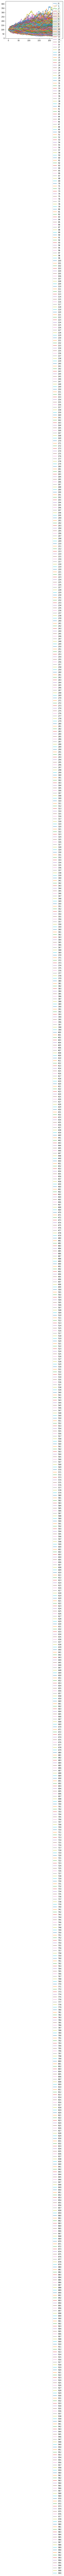

In [13]:
pd.DataFrame(paths).plot()